<a href="https://colab.research.google.com/github/JGCMachado/Portfolio/blob/main/MVP3_Emendas_Parlamentares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Engenharia de Dados
Profs. Victor Almeida e Silvio Alonso

##Aluno: José Guilherme Campos Machado

#1.0 Descrição

Esse trabalho é referente ao MVP da 3ª sprint (Engenharia de Dados) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ


Nele será desenvolvida uma pipeline de dados utilizando tecnologias de nuvem na plataforma da AWS. A pipeline irá conter a busca, coleta, modelagem, carga e análise dos dados.

#2.0 Objetivo escolhido

Encontrar no Portal da Transparência do governo brasileiro informações sobre as verbas destinadas pelos políticos as suas bases eleitorais.

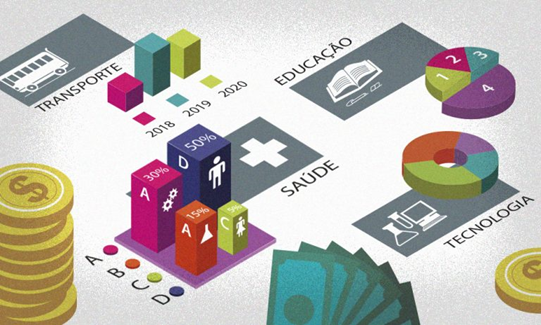

Podemos elencar como possíveis perguntas a serem respondidas:

1)	Quais políticos conseguiram aprovar mais emendas orçamentárias?

2)	Quais políticos aprovaram maiores valores?

3)	Para quais setores foram destinadas mais verbas?

4)	Quais estados receberam mais verbas?




Se for possível tentarei mapear se políticos de situação conseguem aprovar mais emendas orçamentárias que políticos de oposição.

#3.0 Detalhamento

##3.1 Busca pelos dados

Para responder as perguntas citadas acima busquei no Portal da Transparência do governo brasileiro informações detalhadas sobre emendas parlamentares referentes a orçamento.

No site existe a possibilidade de filtrar as informações, mas também existe um arquivo único com as informações disponíveis a partir de 2014.

https://portaldatransparencia.gov.br/download-de-dados/emendas-parlamentares

Optei por baixar o arquivo único



Referente a licença de uso dos dados:

(Trechos retirados do site)

**Dados Abertos**

“O Portal Mapa Brasil Transparente disponibiliza as informações das consultas em formato apropriado para download e processamento. O usuário poderá baixar as informações referentes às avaliações independentes e fazer todos os cruzamentos e análises desejados.

O novo Portal da Transparência reforça, assim, com novos recursos e mais informações, sua razão de ser uma ferramenta que permita ao cidadão, de forma cada vez mais eficiente, fiscalizar e assegurar a boa e correta aplicação dos recursos públicos federais.

O acesso ao Portal não requer usuário nem senhas, sendo permitido a qualquer cidadão navegar pelas páginas de forma livre, bem como visualizar e utilizar os dados disponíveis da forma que melhor lhe convier.”


##3.2 Coleta

Apos encontrar o dataset de Emendas Parlamentares no Portal da Trasnsparência e baixa-lo passei a analizar mais a fundo o seu conteudo.


###3.2.1 Analise Exploratória

Vou carregar o arquivo para melhor conhece-lo. A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv com cabeçalho disponibilizado no github.


In [ ]:
# Importação biblioteca Pandas
import pandas as pd

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# O arquivo já contem o cabeçalho
# Carrega a variavel com o endereço do arquivo no github que contem o dataset
filename = "https://raw.githubusercontent.com/JGCMachado/Datasets/main/emendas.csv"
delimitador = ';'

# carga do dataset adicionando os nomes das colunas
emendas = pd.read_csv(filename, delimiter=delimitador)

In [ ]:
# verifica o tipo do dataset heart_disease
print(type(emendas))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
emendas.head(5)

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
0,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,SÃO JOÃO DO CARÚ - MA,10,Saúde,301,Atenção básica,1253150,0,0,0,0,1253150
1,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,BORBA - AM,10,Saúde,122,Administração geral,999958,0,0,0,0,999958
2,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,Nacional,13,Cultura,392,Difusão cultural,"1665560,68",150860,0,0,"243083,14","1422477,54"
3,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,MARANHÃO (UF),18,Gestão ambiental,544,Recursos hídricos,500000,0,0,0,500000,0
4,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,PERNAMBUCO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,"23826320,09",0,0,0,"6463502,51","17362817,58"


In [ ]:
# Mostra as dimensões do dataset
print(emendas.shape)

(59138, 17)


Verificando os dados importados percebi que o dicionário disponibilizado não esta 100% compatível com os dados do dataset. Os campos "Codigo IBGE Município", "Nome do Município", "Nome do Estado", "Codigo da Região" e "Nome da Região" que constam do dicionário de dados foram substituido pelo campo "Localidade do gasto" que é mencionado como "Regionalização"

No dataset também consta o campo não documentado "Tipo de Emenda". Campo categórico com o dominio: 'Estadual', 'Municipal', 'Nacional' e 'S/I' (Sem Informação.

Para facilitar a realização das consultas que vão responder as questões levantadas no item 2.0 senti necessidade de criar dois campos. Um campo com a Abrangência da Emenda ("Municipal", "Estadual" ou "Nacional") e outro campo com a Sigla da UF referênte a Abrangência da Emenda sendo "BR" utilizado quando Abrangência Nacional.

As informações necessárias para as novas colunas puderam ser extraidas com base no campo "Localidade do gasto". Quando a Emenda é municipal este campo contem o nome do município seguido de um "-" e a sigla do estado do município, quando é estadual contem o nome do estado seguido da string "(UF)" e quando é uma Emenda de nivel nacional contem "nacional"

Vou criar uma lista contendo os nomes dos estados e suas siglas e 2 funções para criar as novas colunas

In [ ]:
# Dicionário de mapeamento de nomes de estados para siglas de UFs
mapeamento_estado_uf = {
    'ACRE': 'AC',
    'ALAGOAS': 'AL',
    'AMAPÁ': 'AP',
    'AMAZONAS': 'AM',
    'BAHIA': 'BA',
    'CEARÁ': 'CE',
    'DISTRITO FEDERAL': 'DF',
    'ESPÍRITO SANTO': 'ES',
    'GOIÁS': 'GO',
    'MARANHÃO': 'MA',
    'MATO GROSSO': 'MT',
    'MATO GROSSO DO SUL': 'MS',
    'MINAS GERAIS': 'MG',
    'PARÁ': 'PA',
    'PARAÍBA': 'PB',
    'PARANÁ': 'PR',
    'PERNAMBUCO': 'PE',
    'PIAUÍ': 'PI',
    'RIO DE JANEIRO': 'RJ',
    'RIO GRANDE DO NORTE': 'RN',
    'RIO GRANDE DO SUL': 'RS',
    'RONDÔNIA': 'RO',
    'RORAIMA': 'RR',
    'SANTA CATARINA': 'SC',
    'SÃO PAULO': 'SP',
    'SERGIPE': 'SE',
    'TOCANTINS': 'TO'
}

# Função para definir o tipo da abrangência do gasto da emenda com base na coluna Localidade do gasto
def definir_abrangencia_emenda(row):
    if '(UF)' in row['Localidade do gasto']:
        return 'Estadual'
    elif 'Nacional' in row['Localidade do gasto']:
        return 'Nacional'
    elif ' - ' in row['Localidade do gasto']:
        return 'Municipal'
    else:
        return 'NI'


# Função para definir o valor da coluna 'abrangencia_sigla' com base nas condições
def definir_abrangencia_sigla(localidade):
    if ' - ' in localidade:
        return localidade.split(' - ')[1]
    elif ' (UF)' in localidade:
        estado = localidade.split(' (UF)')[0]
        return mapeamento_estado_uf.get(estado, estado)  # Usar o mapeamento para obter a sigla da UF
    elif 'Nacional' in localidade:
        return 'BR'
    else:
        return 'NI'  # Caso padrão, pode ser ajustado conforme necessário


###3.2.2 Inclusão das colunas

Inclusão das colunas 'Abrangencia Emenda' e 'Abrangencia Sigla' baseadas no conteudo da coluna 'Localidade do gasto'

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Emenda'
emendas['Abrangencia Emenda'] = emendas.apply(definir_abrangencia_emenda, axis=1)

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Sigla'
emendas['Abrangencia Sigla'] = emendas['Localidade do gasto'].apply(definir_abrangencia_sigla)


In [ ]:
# exibe as primeiras linhas para confirmar a inclusão das colunas
emendas.head(5)

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos,Abrangencia Emenda,Abrangencia Sigla
0,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,SÃO JOÃO DO CARÚ - MA,10,Saúde,301,Atenção básica,1253150,0,0,0,0,1253150,Municipal,MA
1,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,BORBA - AM,10,Saúde,122,Administração geral,999958,0,0,0,0,999958,Municipal,AM
2,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,Nacional,13,Cultura,392,Difusão cultural,"1665560,68",150860,0,0,"243083,14","1422477,54",Nacional,BR
3,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,MARANHÃO (UF),18,Gestão ambiental,544,Recursos hídricos,500000,0,0,0,500000,0,Estadual,MA
4,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,PERNAMBUCO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,"23826320,09",0,0,0,"6463502,51","17362817,58",Estadual,PE


In [ ]:
# Mostra as informações do dataset
print(emendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59138 entries, 0 to 59137
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Código da Emenda                 59138 non-null  object
 1   Ano da Emenda                    59138 non-null  int64 
 2   Tipo de Emenda                   59138 non-null  object
 3   Código do Autor da Emenda        59138 non-null  object
 4   Nome do Autor da Emenda          59138 non-null  object
 5   Número da emenda                 59138 non-null  object
 6   Localidade do gasto              59138 non-null  object
 7   Código Função                    59138 non-null  object
 8   Nome Função                      59138 non-null  object
 9   Código Subfunção                 59138 non-null  object
 10  Nome Subfunção                   59138 non-null  object
 11  Valor Empenhado                  59138 non-null  object
 12  Valor Liquidado                 

###3.2.3 Salvando o Dataset
Nessa sessão o dataset é salvo com o nome "emendas_parlamentares" no disco efêmero do Colab. Na sequencia realizei um download do mesmo para subir em um Bucket S3 no ambiente da AWS


In [ ]:
# Salvar o DataFrame como um arquivo CSV com codificação UTF-8
emendas.to_csv('emendas_parlamentares.csv', sep=';', index=False, encoding='utf-8-sig')

##3.3 Modelagem

A modelagem de dados desempenha um papel importante no processo de ETL, ela garante que os dados sejam armazenados de maneira eficiente para suportar a geração de análises e relatórios.

Para este trabalho foi desenvolvido um modelo com uma tabela flat desnormalizada conforme ilustração abaixo






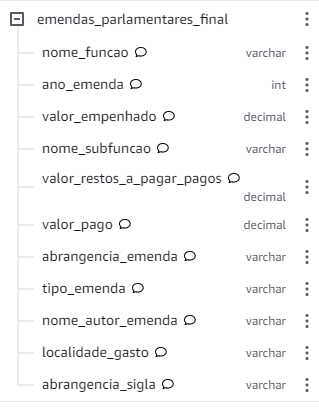

###3.3.1 Catalogo de dados

Um catálogo de dados e uma documentação adequada são pilares essenciais da governança de dados. O catálogo de dados oferece uma visão organizada e acessível dos dados da organização, promovendo a transparência e facilitando o acesso.

Além disso, ele apoia a integração de dados de diferentes fontes, minimiza redundâncias e melhora a qualidade geral dos dados, contribuindo para a tomada de decisões. A documentação, por sua vez, garante que os processos, políticas e procedimentos relacionados aos dados sejam claramente definidos e compreendidos, facilitando a manutenção, a rastreabilidade e a colaboração entre as equipes.

Juntos, um catálogo de dados bem mantido e uma documentação sólida formam a base de uma governança eficaz, promovendo a confiabilidade, a segurança e a maximização do valor dos ativos de dados de uma organização.

Para este trabalho a documentação da tabela e de seus atributos foi realizada no **Glue Data Catalog** no ambiente da AWS conforme os prints abaixo:


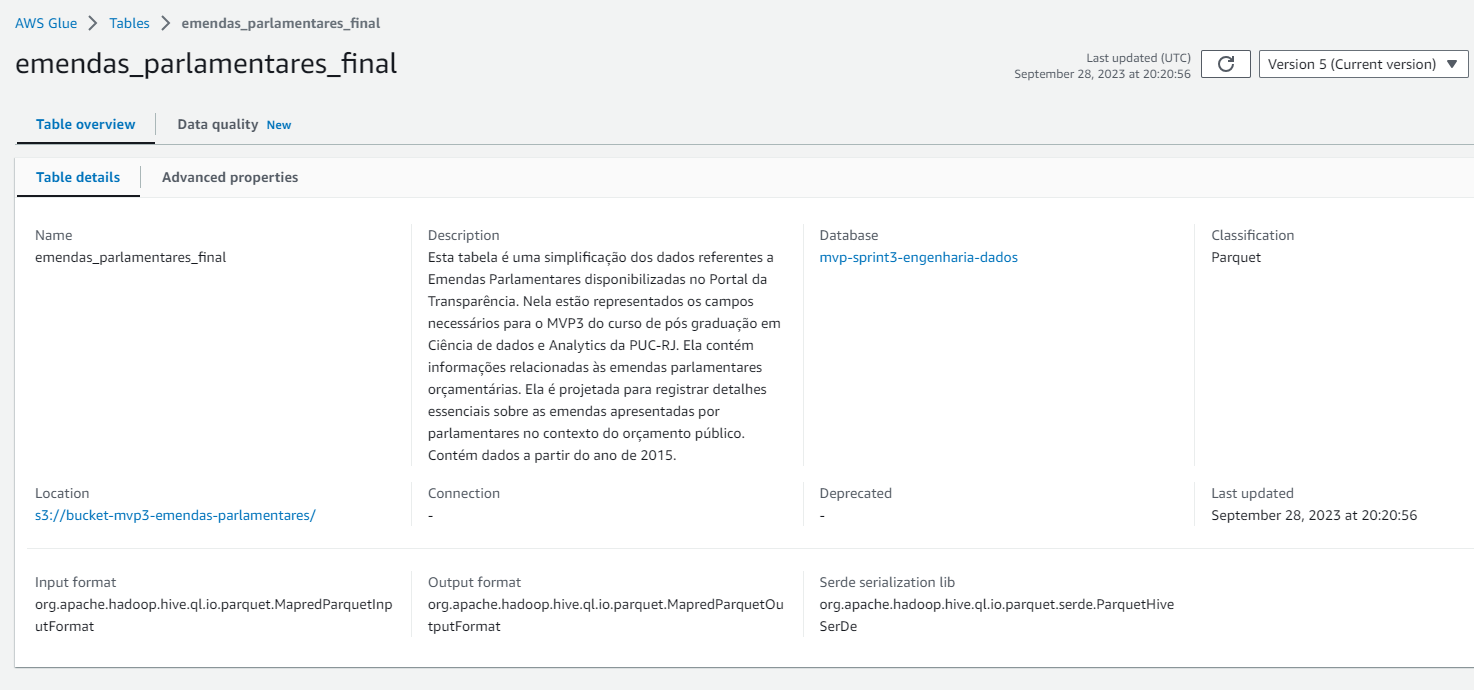

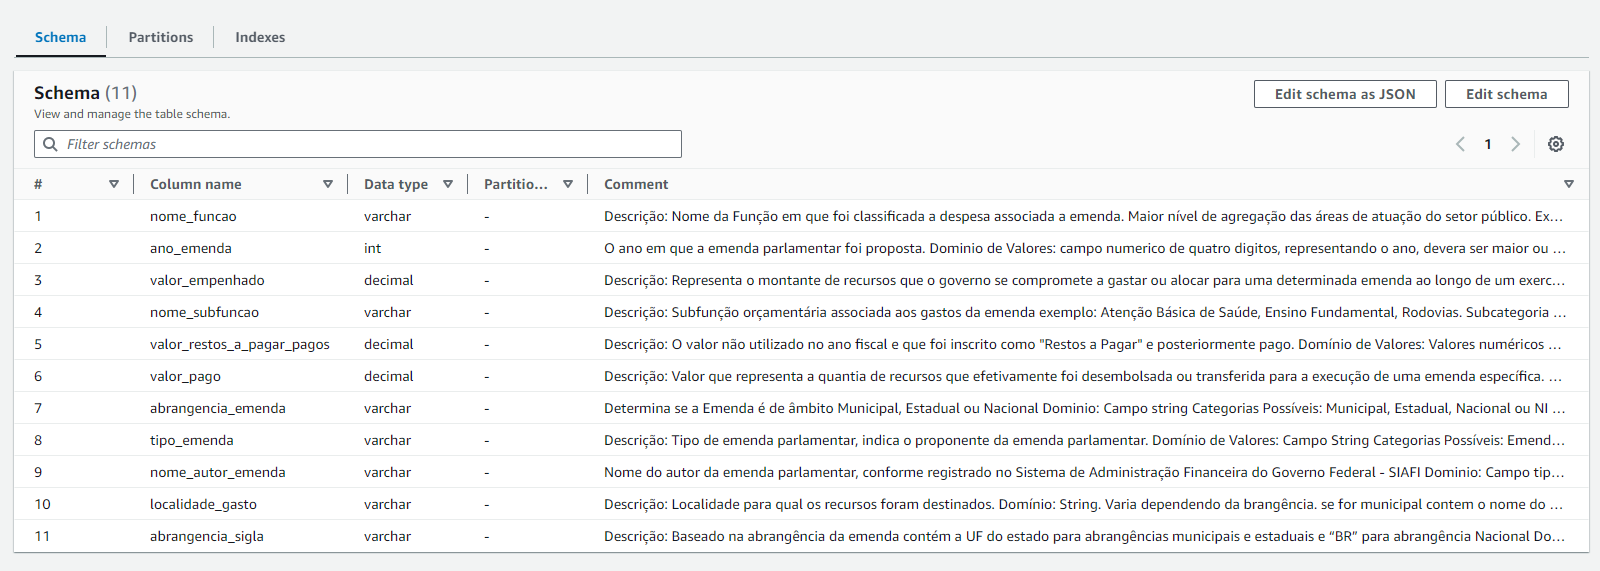

O Data catalog permite salvar o schema em formato Json, desta forma anexei o link para facilitar a visualização da documentação dos atributos

https://github.com/JGCMachado/Scripts/blob/main/Descricao_Campos.json


Abaixo podemos ver a integração da documentação entre diferentes serviços. O Data Catalog permite que o Athena tenha acesso as descrições das colunas.

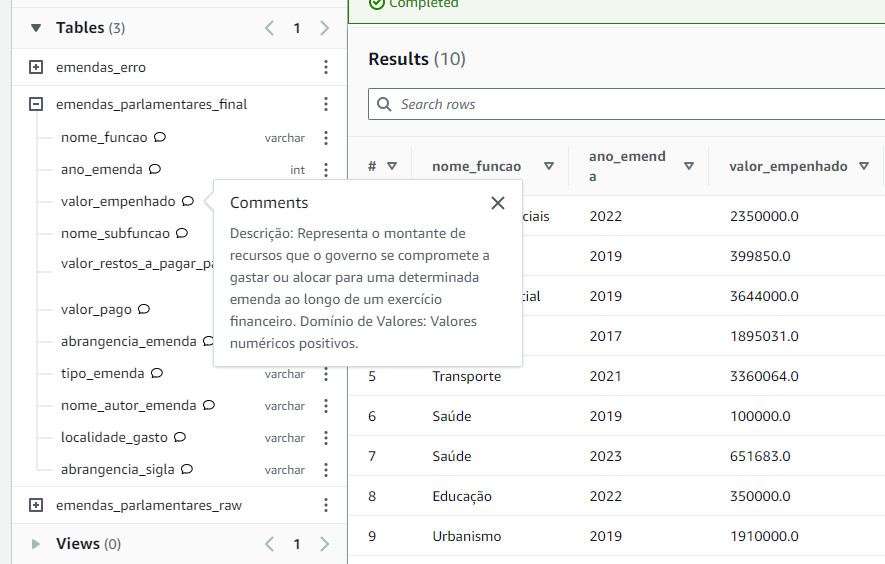

###3.3.1 Arquitetura da Solução e Linhagem dos Dados

####3.3.1.1 Arquitetura Proposta da Solução

O ambiente cloud escolhido para o trabalho foi o da Amazon Web Services (AWS), a seguir uma breve descrição da arquitetura adotada.


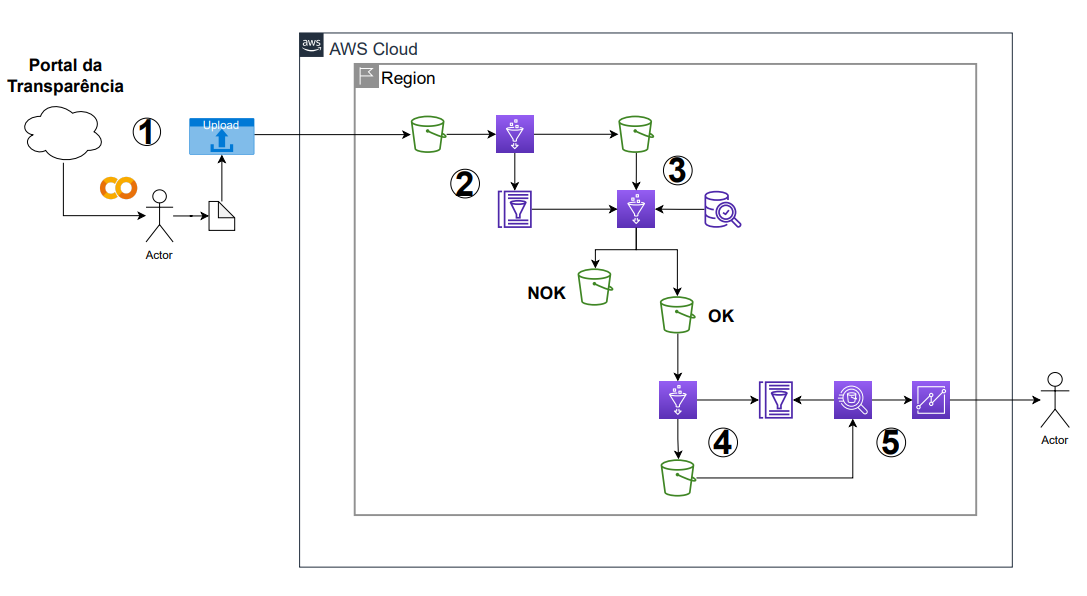

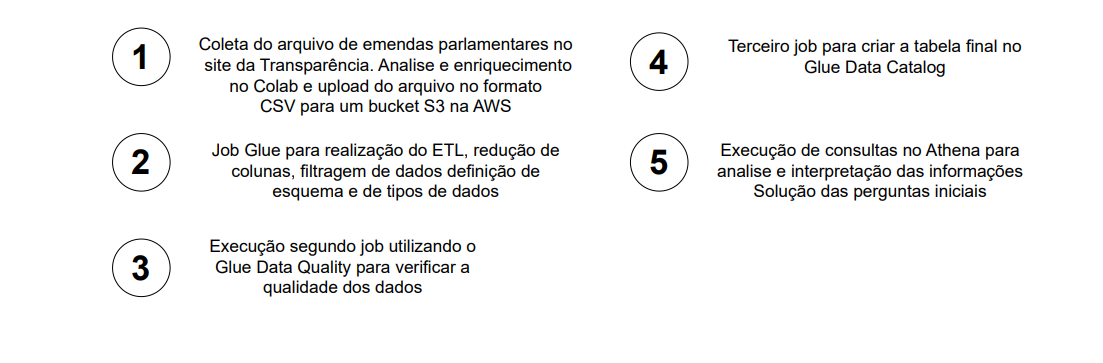

####3.3.1.2 Linhagem dos dados

Conforme já mencionado anteriormente os dados foram baixados do site do Portal da Transparência do governo brasileiro em formato CSV.

Realizada uma analise inicial via Colab para entendimento do dataset foi verificado a necessidade de enriquecer as informações com duas novas colunas referentes a abrangência da emenda parlamentar. Um campo com a Abrangência da Emenda ("Municipal", "Estadual" ou "Nacional") e outro campo com a Sigla da UF referênte a Abrangência da Emenda sendo "BR" utilizado quando abrangência for nacional. Esses dois campos foram preenchidos com o conteudo do campo "Localidade do gasto" que contem tres tipos de informações diferentes.

Estando o dataset montado ele foi disponibilizado via upload em um bucket S3 para iniciar o processo de ETL.

Já em ambiente cloud o primeiro processo executado foi um Job Glue de ETL onde foram descartadas algumas colunas que não seriam utilizadas e a filtragem dos registros eliminando os anteriores a 2015. Os dados no arquivo são disponibilizados a partir de 2014 porem os referentes a 2014 estão com a qualidade muito baixa e não foram incluidos no estudo. Ao final uma tabela intermediária (emendas_parlamentares_raw) é criada no Data Catalog e as informações armazenadas em um bucket S3 em formato parquet.

No próximo Job são executadas algumas regras para verificar a qualidade das informações que são separadas em dois buckets. Um com os registros Ok e outro com os registros que foram reprovadas em alguma regra. Como na fase anterior as informações continuam armazenadas em formato parquet.

Por fim, como o processo de verificação de qualidade não consegue entregar o resultado no catalogo, o terceiro job apenas cria a tabela emendas_parlamentares_final no Data Catalog com o layout descrito no item 3.3 (Modelagem) e disponibiliza os dados em formato parquet para serem consumidos por qualquer ferramenta de analise de dados compativel com esse padrão.

##3.4 Carga

Passemos agora para a documentação dos processos de carga e ETL executados no ambiente AWS.

O processo consiste em tres Jobs desenvolvidos utilizando o AWS Glue Studio, uma ferramenta visual que simplifica o desenvolvimento de fluxos de dados ETL.

Como repositório dos metadados utilizei o AWS Glue Data Catalog é um serviço de metadados totalmente gerenciado que simplifica e acelera a descoberta, o acesso e a governança de dados em ambientes de nuvem.

Para verificação da qualidade dos dados utilizei o Glue Data Quality ferramenta que permite o desenvolvimento de regras de qualidade utilizando a linguagem dqld. Aproveitei esse trabalho para conhecer um pouco desse serviço que está em preview.

Por fim para verificar o resultado dos processos e das transformsções utilizei o AWS Athena, ferramenta serverless que permite em conjunto com o Data Catalog, consultas e analise em grandes volumes de dados armazenados no Amazon S3 usando a linguagem padrão do SQL. Com o Athena é possível executar consultas ad-hoc em dados semi-estruturados ou estruturados sem a necessidade de provisionar ou gerenciar infraestrutura.

###3.4.1 O ETL

O primeiro Job executado é responsável pelas transformações e filtragem dos dados. Logo no primeiro nó é realizada a ingestão do arquivo original no formato CSV que foi disponibilizado em um bucket.


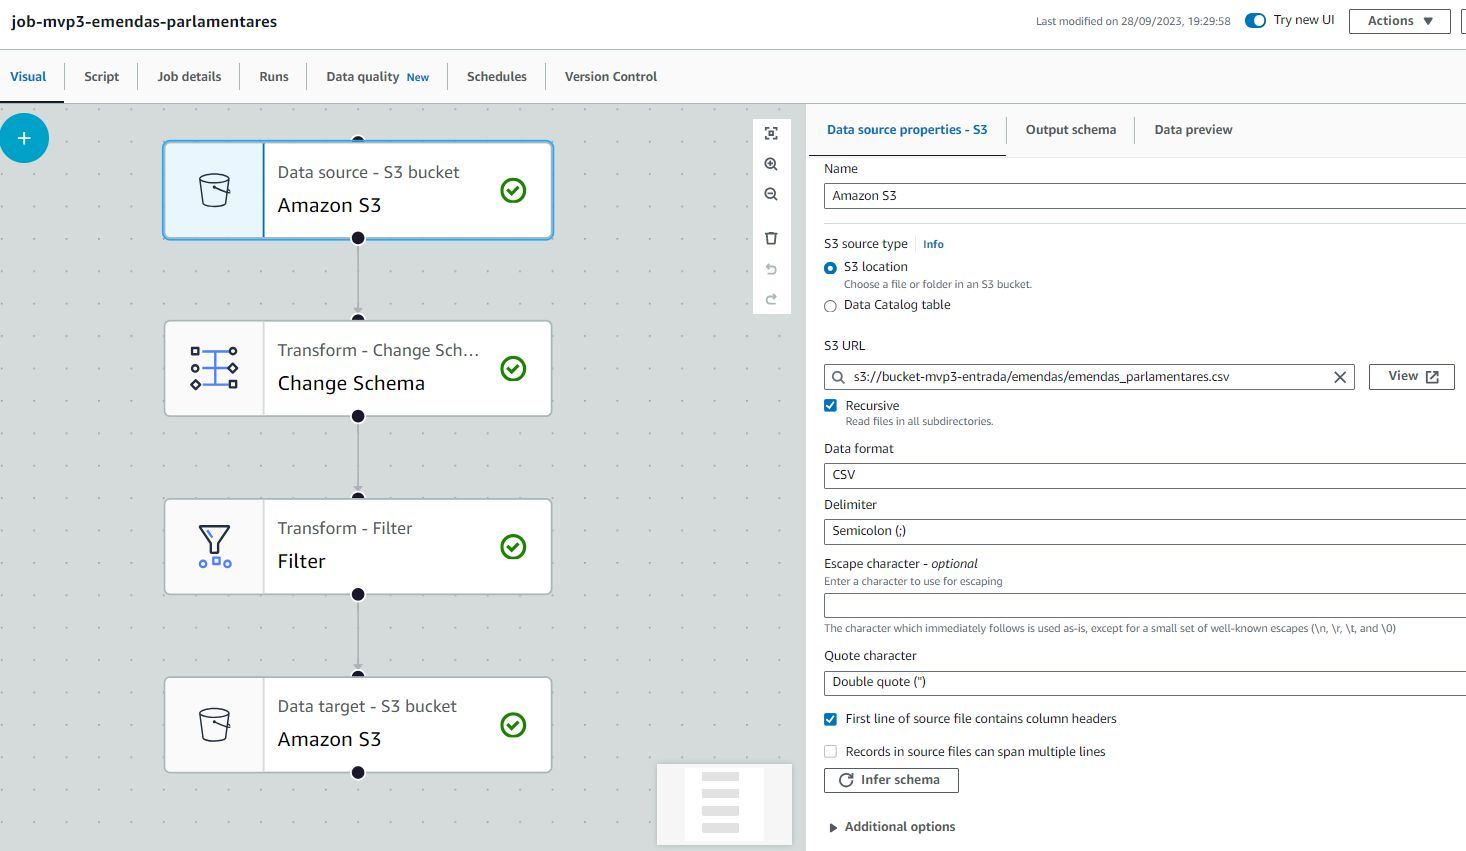

No segundo nó do processo ocorre a transformação do esquema, descartando os campos não necessário e equalizando os data types. Podemos observar logo abaixo uma pequena amostra dos dados resultantes.

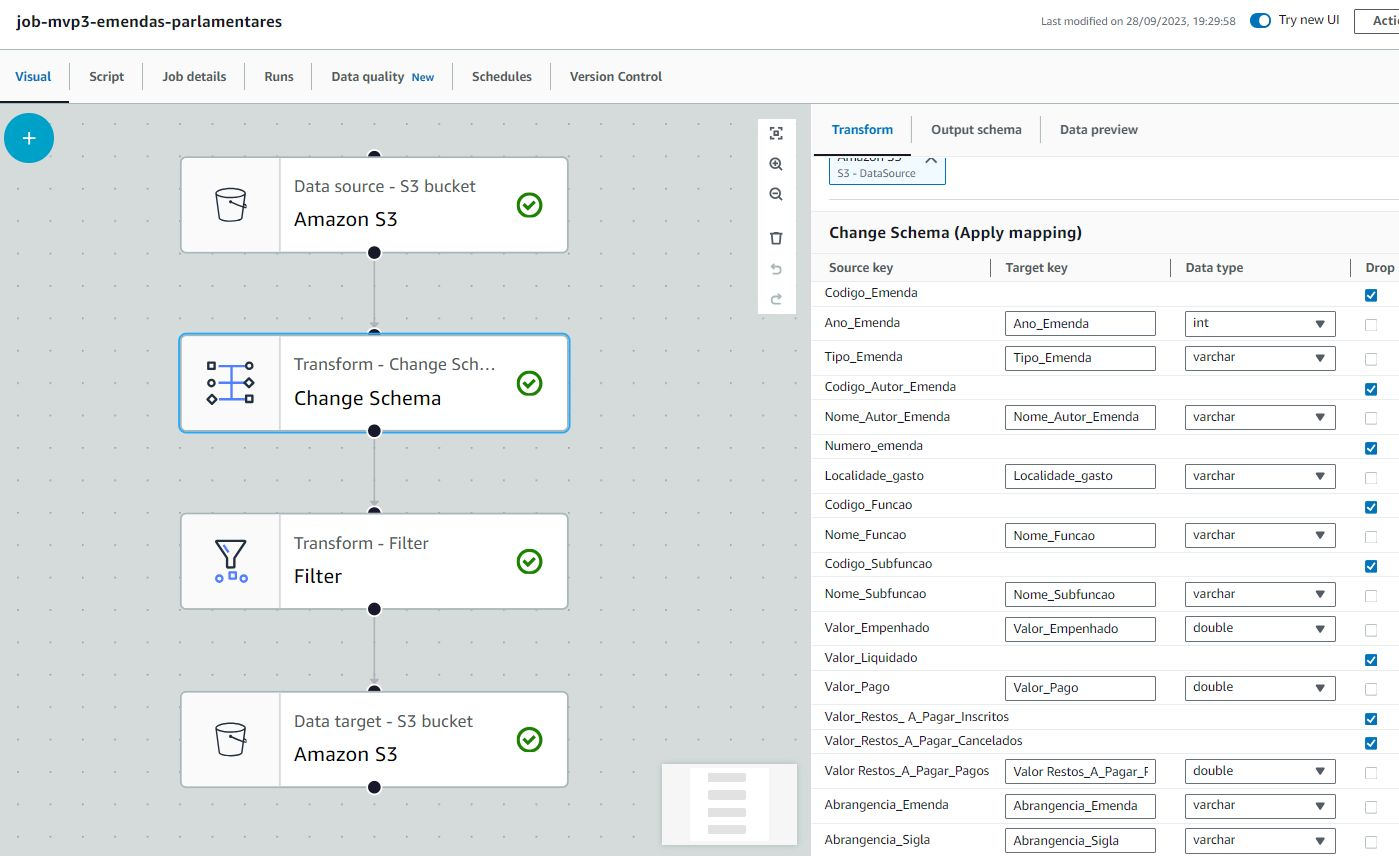

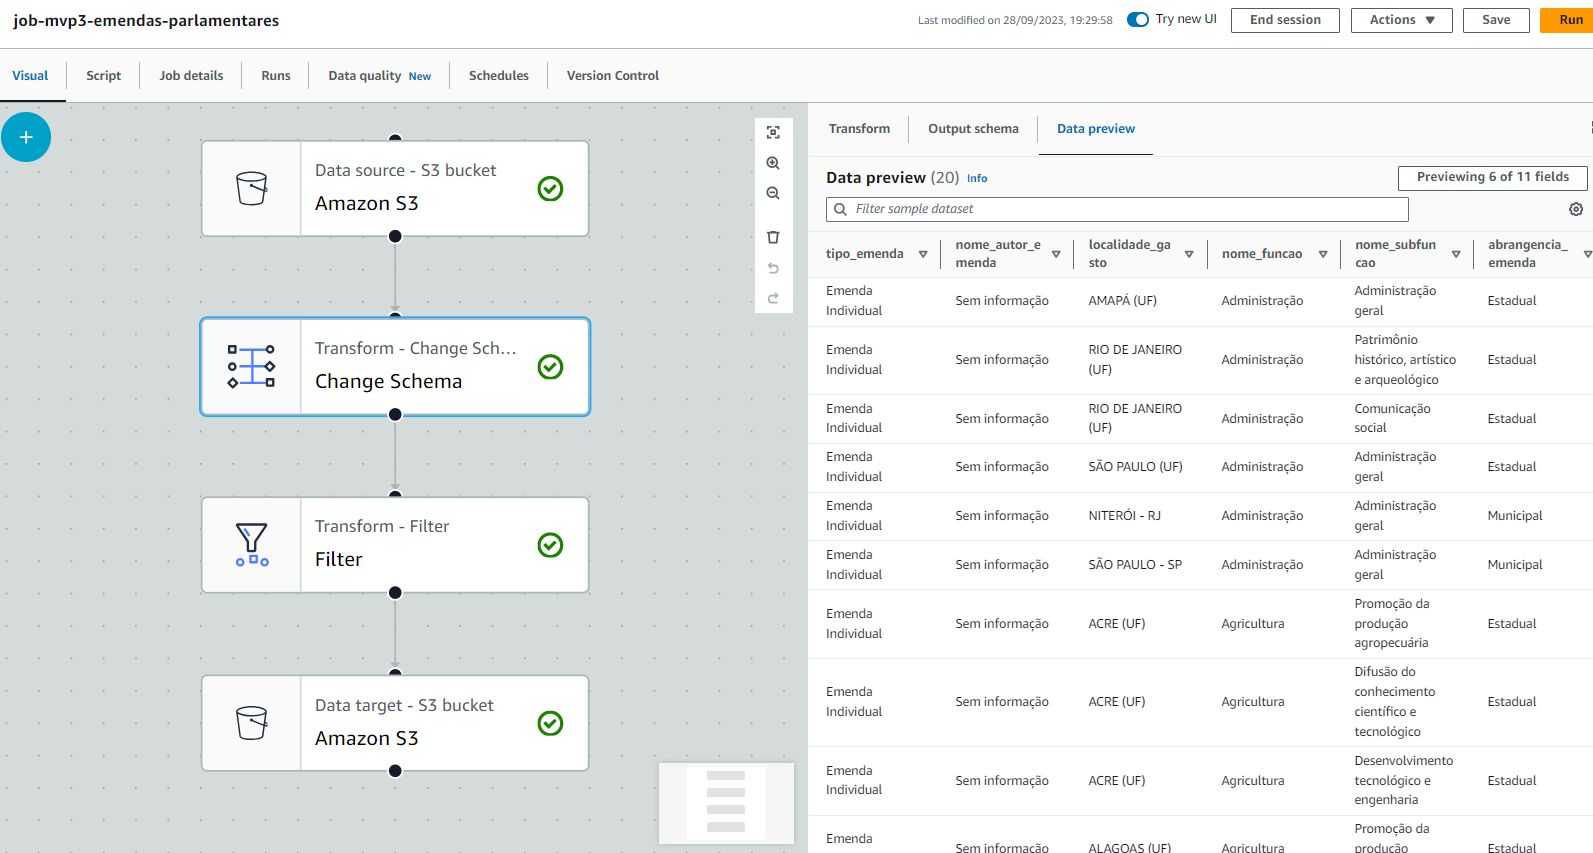

No terceiro nó é realizada a seleção dos registros posteriores ao ano de 2014. Conforme mencionado anteriormente, a qualidade dos dados referentes ao ano de 2014 estava muito precária com muita informação faltante.
Podemos observar também nesse nó o formato já definitivo do esquema dos dados resultante desse primeiro job.

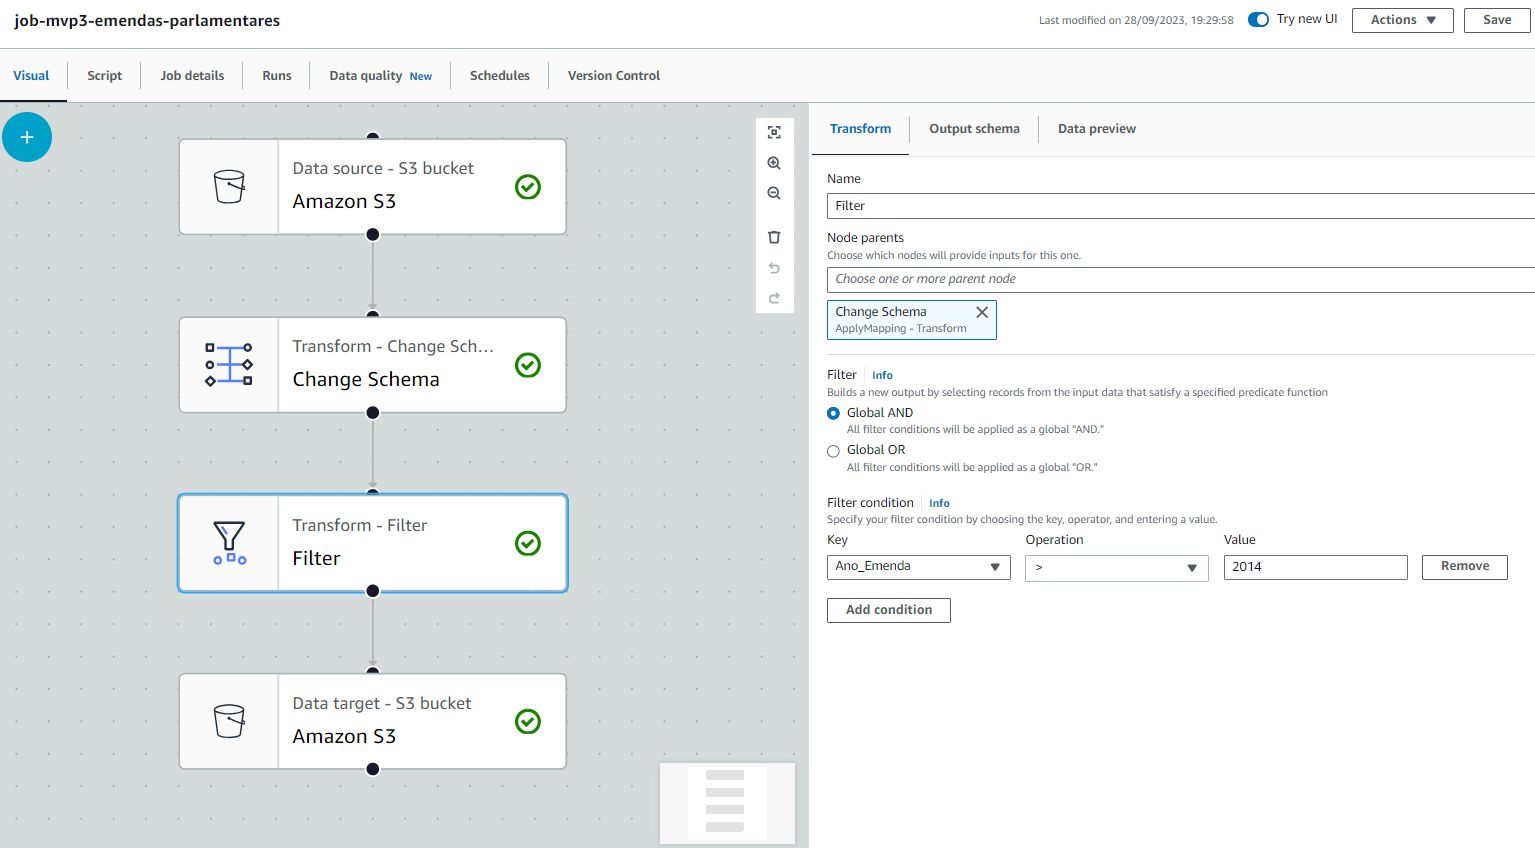

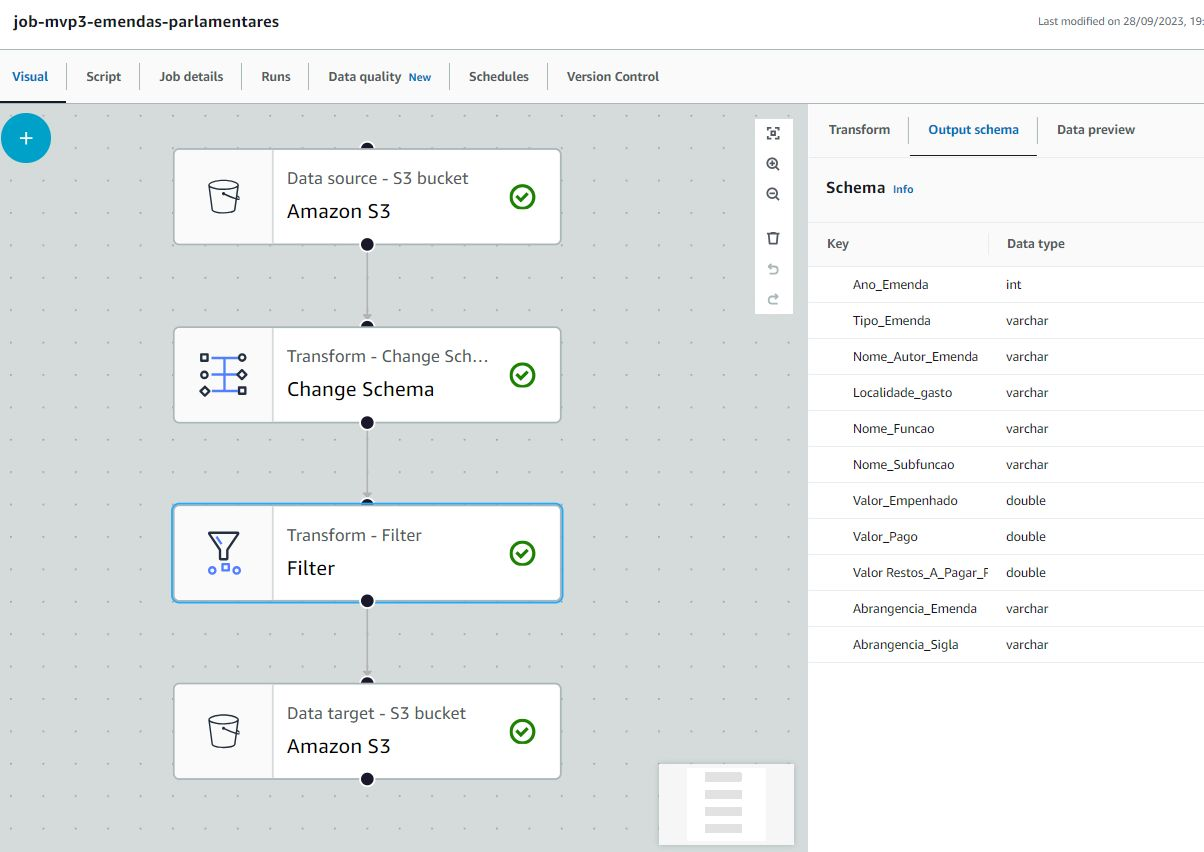

Por fim no ultimo nó deste job vemos a configuração final para salvar o resultado em um bucket chamado "emendas-tratadas" e catalogar os metadados na tabela intermediária do processo chamada "emendas_parlamentares_raw" em formato colunar parquet usado comumente em processamento de big data e análise de dados.

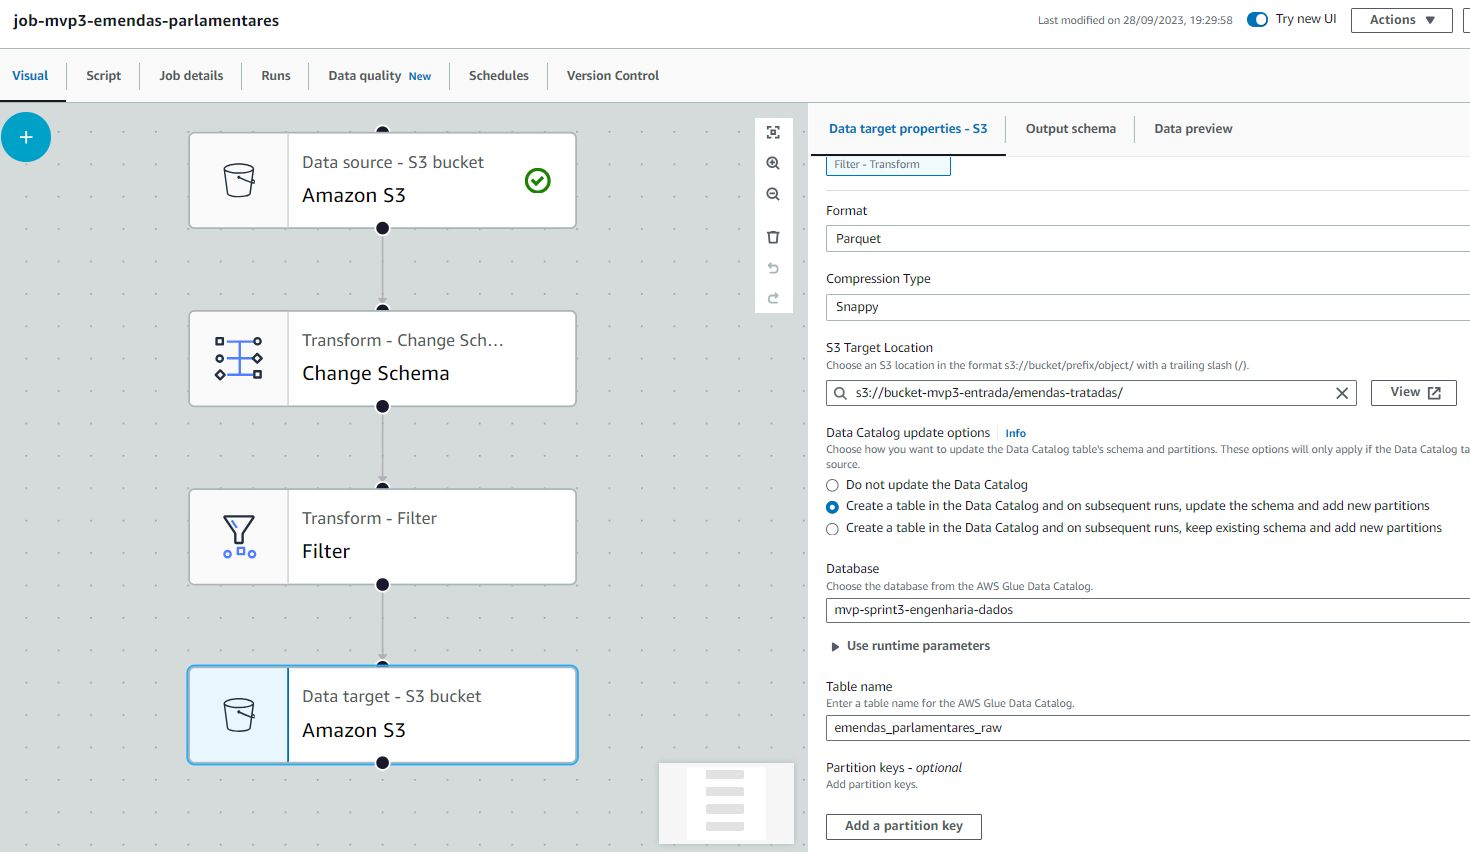

Abaixo a evidência de execução do Job

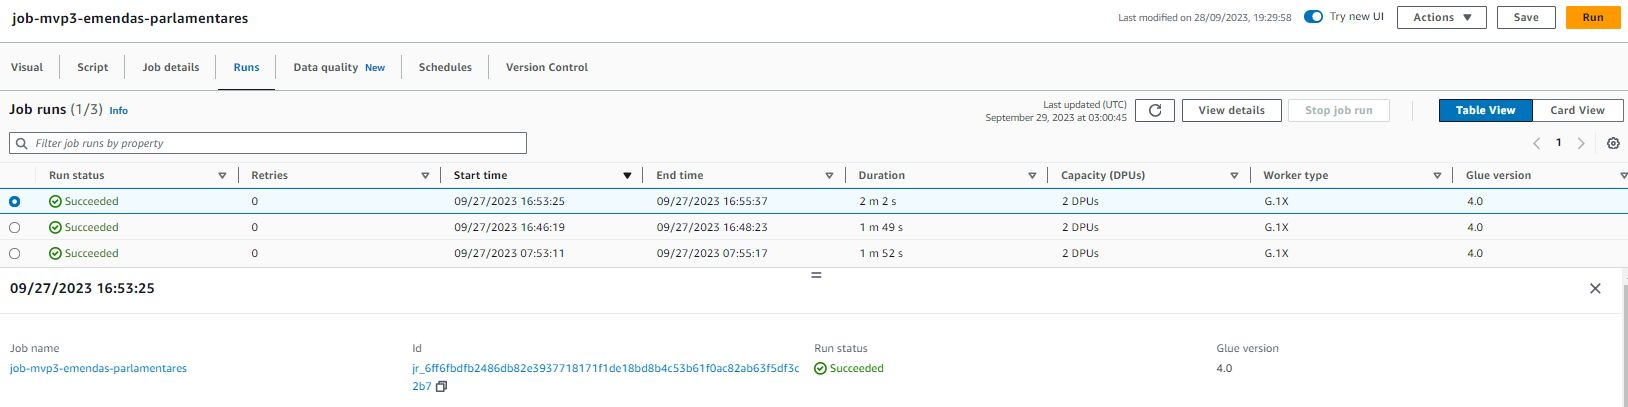

###3.4.2 Validando a Qualidade dos dados

**Descrevendo o Processo**


No segundo nó eu utilizo o Glue Data Quality para verificar a qualidade das informações. O Data Quality é um serviço novo (até esta data estava em preview disponível apenas em algumas regiões) que permite avaliar e monitorar a qualidade dos dados atravéz de regras definidas na linquagem Data Quality Definition Language (DQDL).



Este job consiste no processo de validação dos dados baseado nas regras criadas. Podemos observar na ilustração abaixo que o nó "Evaluate Data Quality" recebe informações de quatro outros nós. O primeiro é ingestão da nossa tabela intermediária resultante do processo anterior. É ela que contem os dados para validação. A ingestão é feita atravéz do Data Catalog. Os outros tres nós são dominios contra os quais alguns dados serão validados.

Abaixo do nó "Evaluate Data Quality" vemos dois caminhos. Pela direita são armazenadas informações sobre a execução das regras. Pela esquerda temos um nó com validação condicional que separa os registros que passaram na validação dos que foram reprovados. Ambos são armazenados em buckets distintos e em formato parquet.

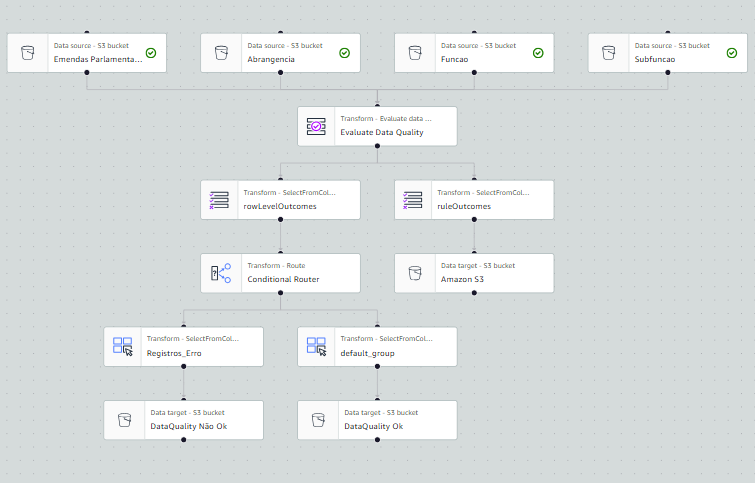